# Linear Regression

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
from torch.autograd import Variable

sns.set_style('whitegrid')

In [23]:
# Parameters of linear model
slope = 3
intercept = 2
x = np.random.uniform(0, 1, 500)

# To add noise to the model
noise = np.random.randn(500)/3

# Final y data
y = slope * x + intercept + noise

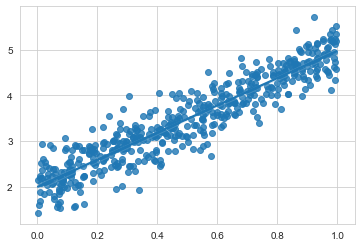

In [24]:
sns.regplot(x, y)

## Test using Torch model

In [224]:
# Shaping input data
x_train = torch.from_numpy(x).view(-1,1).float()
y_train = torch.from_numpy(y).view(-1,1).float()

input_dim = x_train.shape[1]
output_dim = y_train.shape[1]

In [225]:
# Defining learning rate
learning_rate = .1

In [226]:
class LinearRegressionModel(nn.Module):
    '''Linear regression model to test PyTorch'''
    def __init__(self, input_dim, output_dim):
        '''Constuctor of our LinearRegressionModel'''
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
    
    def forward(self, x):
        return self.linear(x)

In [227]:
model = LinearRegressionModel(input_dim, output_dim)
criterion = nn.MSELoss()

In [229]:
# Training
for epoch in range(500):
    y_pred = model(x_train)
    loss = criterion(y_pred, y_train)
    print('epoch : {:3d}, loss : {:1.3f}'.format(epoch, loss.item()))  
    model.zero_grad()
    loss.backward()
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

epoch :   0, loss : 10.020
epoch :   1, loss : 5.869
epoch :   2, loss : 3.537
epoch :   3, loss : 2.224
epoch :   4, loss : 1.482
epoch :   5, loss : 1.062
epoch :   6, loss : 0.821
epoch :   7, loss : 0.681
epoch :   8, loss : 0.598
epoch :   9, loss : 0.547
epoch :  10, loss : 0.514
epoch :  11, loss : 0.491
epoch :  12, loss : 0.474
epoch :  13, loss : 0.461
epoch :  14, loss : 0.449
epoch :  15, loss : 0.439
epoch :  16, loss : 0.430
epoch :  17, loss : 0.421
epoch :  18, loss : 0.412
epoch :  19, loss : 0.404
epoch :  20, loss : 0.396
epoch :  21, loss : 0.388
epoch :  22, loss : 0.381
epoch :  23, loss : 0.374
epoch :  24, loss : 0.367
epoch :  25, loss : 0.360
epoch :  26, loss : 0.353
epoch :  27, loss : 0.347
epoch :  28, loss : 0.340
epoch :  29, loss : 0.334
epoch :  30, loss : 0.328
epoch :  31, loss : 0.323
epoch :  32, loss : 0.317
epoch :  33, loss : 0.312
epoch :  34, loss : 0.306
epoch :  35, loss : 0.301
epoch :  36, loss : 0.296
epoch :  37, loss : 0.291
epoch :  38

epoch : 353, loss : 0.119
epoch : 354, loss : 0.119
epoch : 355, loss : 0.119
epoch : 356, loss : 0.119
epoch : 357, loss : 0.119
epoch : 358, loss : 0.119
epoch : 359, loss : 0.119
epoch : 360, loss : 0.119
epoch : 361, loss : 0.119
epoch : 362, loss : 0.119
epoch : 363, loss : 0.119
epoch : 364, loss : 0.119
epoch : 365, loss : 0.119
epoch : 366, loss : 0.119
epoch : 367, loss : 0.119
epoch : 368, loss : 0.119
epoch : 369, loss : 0.119
epoch : 370, loss : 0.119
epoch : 371, loss : 0.119
epoch : 372, loss : 0.119
epoch : 373, loss : 0.119
epoch : 374, loss : 0.119
epoch : 375, loss : 0.119
epoch : 376, loss : 0.119
epoch : 377, loss : 0.119
epoch : 378, loss : 0.119
epoch : 379, loss : 0.119
epoch : 380, loss : 0.119
epoch : 381, loss : 0.119
epoch : 382, loss : 0.119
epoch : 383, loss : 0.119
epoch : 384, loss : 0.119
epoch : 385, loss : 0.119
epoch : 386, loss : 0.119
epoch : 387, loss : 0.119
epoch : 388, loss : 0.119
epoch : 389, loss : 0.119
epoch : 390, loss : 0.119
epoch : 391,

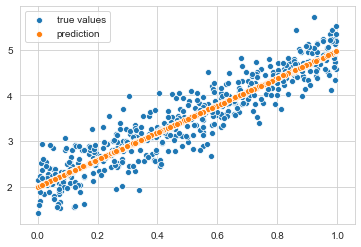

In [244]:
sns.scatterplot(x, y, label='true values')
sns.scatterplot(x, y_pred.detach().numpy().reshape(-1,), label='prediction')
plt.legend()
plt.show()

In [241]:
[w, b] = model.parameters()
print('True slope : {}, predicted : {:1.3f}'.format(slope, w.item()))
print('True intercept : {}, predicted : {:1.3f}'.format(intercept, b.item()))

True slope : 3, predicted : 2.981
True intercept : 2, predicted : 1.995
